In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

Let's initialize the data

In [2]:
DATA = Path('data')
section1 = DATA / 'Section 1 data.csv'
section3 = DATA / 'Section 3 data.csv'

# Section 1
The Yelp reviews dataset.

In [3]:
df1 = pd.read_csv(section1)

df1.head()

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227581 entries, 0 to 227580
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Review_Date               227581 non-null  object 
 1   Review_Text               227580 non-null  object 
 2   User_ID                   227581 non-null  object 
 3   Business_ID               227581 non-null  object 
 4   Business_Name             227581 non-null  object 
 5   Business_Category         227297 non-null  object 
 6   City                      227581 non-null  object 
 7   State                     227581 non-null  object 
 8   Latitude                  227581 non-null  float64
 9   Longitude                 227581 non-null  float64
 10  Avg_Business_Star_Rating  227581 non-null  float64
dtypes: float64(3), object(8)
memory usage: 19.1+ MB


## How many unique restaurants could be found in this data set? (Hint: Use the [Business_ID] column for this evaluation.)

In [5]:
# first look at unique business categories
df1['Business_Category'].unique()

array(['Bars', 'Food', 'Thai', 'Tapas/Small Plates', 'Sushi Bars',
       'Mortgage Brokers', 'Korean', 'Breakfast & Brunch', 'Peruvian',
       'Burgers', 'Japanese', 'Seafood', 'Nightlife', 'Mexican',
       'Bakeries', 'Tires', 'Restaurants', 'Active Life', 'DJs',
       'Local Services', 'Health & Medical', 'Pubs',
       'Arts & Entertainment', 'Shopping', 'Soul Food', 'Resorts',
       'Comic Books', 'American (New)', 'Arts & Crafts', 'Skin Care',
       'Doctors', 'Plumbing', 'Day Spas', 'Latin American',
       'Hotels & Travel', 'Chinese', 'Asian Fusion', 'Steakhouses',
       'Hair Removal', 'Italian', 'Beauty & Spas', 'Irish', 'Greek',
       'Sandwiches', 'Buffets', 'Car Wash', 'Delis',
       'American (Traditional)', 'Barbeque', 'Department Stores',
       'Mediterranean', 'Vegetarian', 'Health Markets',
       'Event Planning & Services', 'Indian', 'Sporting Goods',
       'Hawaiian', 'Gluten-Free', 'Auto Repair', 'Hair Salons',
       'Hot Dogs', 'Gastropubs', 'Local Fl

In [6]:
# first get number of restaurant reviews, using Business_Category
restaurants = df1[df1['Business_Category'] == 'Restaurants']

print(f"Number of restaurant reviews: {len(restaurants)}")
print(f"Number of unique restaurants: {restaurants['Business_ID'].nunique()}")

Number of restaurant reviews: 6513
Number of unique restaurants: 594


# Which restaurant received the highest number of reviews? What about percentage-wise?

In [8]:
# Get review count per restaurant
restaurant_review_counts = restaurants.groupby(['Business_ID', 'Business_Name'])['Review_Text'].count().reset_index()
restaurant_review_counts = restaurant_review_counts.rename(columns={'Review_Text': 'Review_Count'})
restaurant_review_counts

,Business_ID,Business_Name,Review_Count
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126
1,-5xC7s9Ujg5F-3xFXtM_kg,Benvenuto's Italian Grill,2
2,-6n29ZcBHteJ9eEexoRQ7g,Sassi,22
3,-DRpMxRhHEKf5awoVpROkQ,Toby Carvery,1
4,-PcyNcCHU8ZWwf6_PwDbUQ,Enoteca San Marco,50
...,...,...,...
589,zD_0Ubr8kY7vGIwxKZCZZw,East Side Mario's,2
590,zNa_IxR49eFTs_EYLE2ZQw,Bertolini's Authentic Trattoria,1
591,zXR9WUVpo-PF8xH5SmQ_xA,Yeni Meze Bar,1
592,z_IfC-aIkKpuhGfX1yzdfg,Alexi's Grill,8


In [10]:
# Calculate percentage of total reviews for each restaurant
total_reviews = len(restaurants)
restaurant_review_counts['Review_Percentage'] = (restaurant_review_counts['Review_Count'] / total_reviews * 100).round(2)
restaurant_review_counts

,Business_ID,Business_Name,Review_Count,Review_Percentage
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126,1.93
1,-5xC7s9Ujg5F-3xFXtM_kg,Benvenuto's Italian Grill,2,0.03
2,-6n29ZcBHteJ9eEexoRQ7g,Sassi,22,0.34
3,-DRpMxRhHEKf5awoVpROkQ,Toby Carvery,1,0.02
4,-PcyNcCHU8ZWwf6_PwDbUQ,Enoteca San Marco,50,0.77
...,...,...,...,...
589,zD_0Ubr8kY7vGIwxKZCZZw,East Side Mario's,2,0.03
590,zNa_IxR49eFTs_EYLE2ZQw,Bertolini's Authentic Trattoria,1,0.02
591,zXR9WUVpo-PF8xH5SmQ_xA,Yeni Meze Bar,1,0.02
592,z_IfC-aIkKpuhGfX1yzdfg,Alexi's Grill,8,0.12


In [12]:
# Sort by review count in descending order and get the top restaurant
top_restaurant = restaurant_review_counts.sort_values('Review_Count', ascending=False).head(1)

print("Restaurant with highest number of reviews:")
print(f"Restaurant Name: {top_restaurant['Business_Name'].values[0]}")
print(f"Number of Reviews: {top_restaurant['Review_Count'].values[0]}")
print(f"Percentage of Total Reviews: {top_restaurant['Review_Percentage'].values[0]}%")

Restaurant with highest number of reviews:
Restaurant Name: LAVO Italian Restaurant & Lounge
Number of Reviews: 201
Percentage of Total Reviews: 3.09%


In [13]:
# Display top 5 restaurants by review count for context
print("Top 5 restaurants by review count:")
restaurant_review_counts.sort_values('Review_Count', ascending=False).head()

Top 5 restaurants by review count:


,Business_ID,Business_Name,Review_Count,Review_Percentage
49,5GKbGn9-fAgQ0njSh3OJ8A,LAVO Italian Restaurant & Lounge,201,3.09
441,iXA8Y2bzvZo8MjALfZxrIg,Margaritaville,137,2.10
75,8Pzdk19tA2bKlKDSgwWqoQ,Scarpetta,134,2.06
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126,1.93
515,rNahhyqDlouyDMHh57p3ug,B&B Ristorante,110,1.69


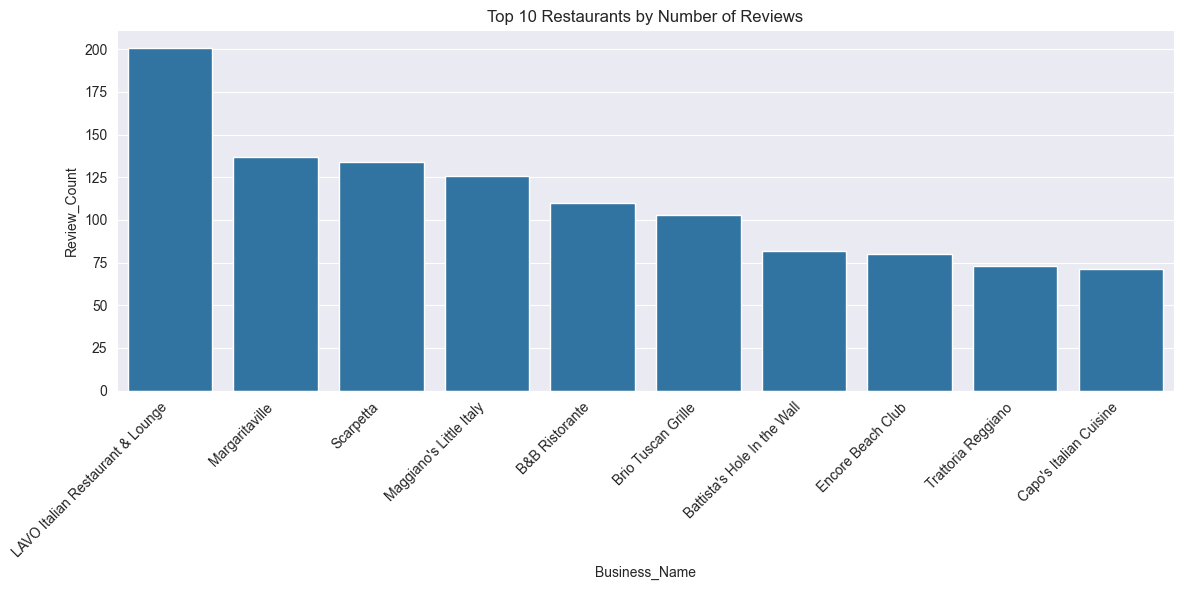

In [15]:
# Create bar plot of top 10 restaurants
plt.figure(figsize=(12, 6))
top_10_restaurants = restaurant_review_counts.nlargest(10, 'Review_Count')
sns.barplot(data=top_10_restaurants, x='Business_Name', y='Review_Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurants by Number of Reviews')
plt.tight_layout()
plt.show()

In [14]:
# Filter for Nevada businesses with 5-star reviews
nevada_five_stars = df1[
    (df1['State'] == 'NV') &
    (df1['Avg_Business_Star_Rating'] == 5)
]

# Get unique cities with 5-star reviews
nevada_cities_five_stars = nevada_five_stars['City'].unique()

# Print the results
print("\nCities in Nevada with at least one 5-star review (all business types):")
for city in sorted(nevada_cities_five_stars):
    print(f"- {city}")


Cities in Nevada with at least one 5-star review (all business types):
- Boulder City
- Henderson
- Las Vegas
- Nellis


In [16]:
# Show count of 5-star reviews per city
city_five_star_counts = nevada_five_stars.groupby('City').size().sort_values(ascending=False)
print("\nNumber of 5-star reviews per city in Nevada:")
print(city_five_star_counts)


Number of 5-star reviews per city in Nevada:
City
Las Vegas       2694
Henderson        382
Boulder City      21
Nellis             4
dtype: int64


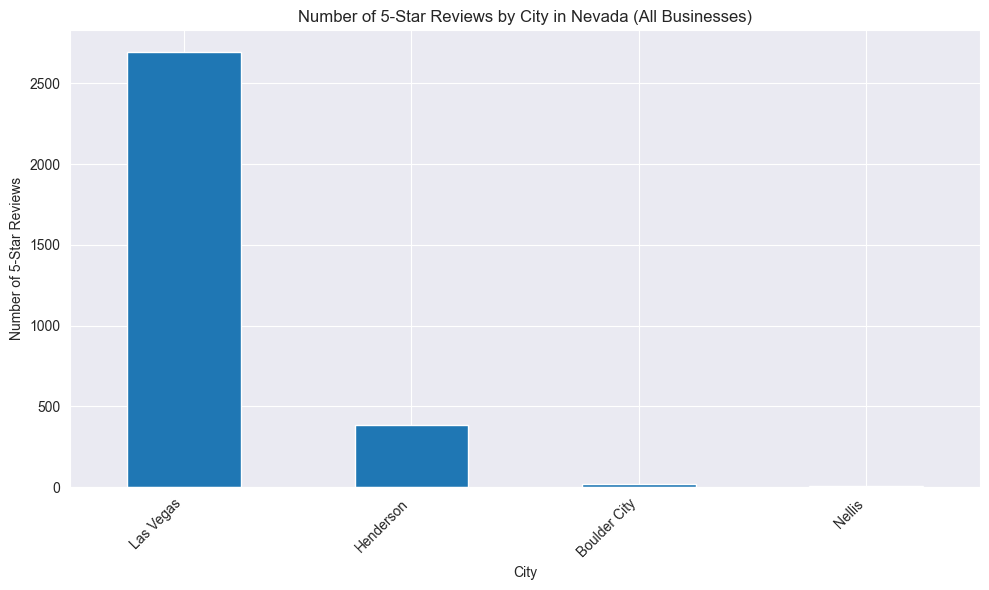

In [17]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
city_five_star_counts.plot(kind='bar')
plt.title('Number of 5-Star Reviews by City in Nevada (All Businesses)')
plt.xlabel('City')
plt.ylabel('Number of 5-Star Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()